### Load the Libraries

In [155]:
import pandas as pd
import numpy as np
import re 
import geopandas as gpd
import pandas as pd
import json
import datetime
import matplotlib.dates as mdates


# Bokeh Shape Files

In [13]:
contiguous_usa = gpd.read_file('map_data/cb_2018_us_state_500k/cb_2018_us_state_500k.shp')
# Remove Alaska and Hawaii
contiguous_usa= contiguous_usa.loc[~contiguous_usa['NAME'].isin(['Alaska', 'Hawaii'])]

## Clean the Shape File City Names

#### Cleaning Utilities 

In [54]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name or '-' in name):
        entry_split= name.split(',')
        if (len(entry_split[0].split('--'))>1):
            print(entry_split[0].split('--'))
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name

#### Perform the Cleaning

In [58]:
urban_areas_usa = gpd.read_file('map_data/cb_2018_us_ua10_500k/cb_2018_us_ua10_500k.shp')
urban_areas_usa = urban_areas_usa.rename(columns={"NAME10": "city_name"})  

# Fix forth Worth from Ft.Worth to Fort Worth or something like that
#urban_areas_usa['city_name'][urban_areas_usa['city_name'].str.contains('-')]
#urban_areas_usa['city_name'] = urban_areas_usa['city_name'].apply(border_states)
#urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Nashville-Davidson, TN'].index.values[0],'city_name'] = 'Nashville, TN' 
#urban_areas_usa.loc[urban_areas_usa['city_name'].loc[urban_areas_usa['city_name']=='Lexington-Fayette, KY'].index.values[0],'city_name'] = 'Lexington, KY' 

In [20]:
urban_areas_usa.sample(5)

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry
2046,14536,400C100US14536,14536,"Cassville, MO",76,C,10734265,11257,"MULTIPOLYGON (((-93.91917 36.68308, -93.91465 ..."
2426,50419,400C100US50419,50419,"Littlestown, PA",76,C,9217966,9796,"MULTIPOLYGON (((-77.05345 39.72923, -77.04741 ..."
1558,72073,400C100US72073,72073,"Prescott, AR",76,C,4806858,25057,"POLYGON ((-93.39960 33.80933, -93.39374 33.807..."
1932,79537,400C100US79537,79537,"Santa Rosa Beach, FL",76,C,20152058,351780,"POLYGON ((-86.29027 30.38050, -86.28792 30.380..."
887,92809,400C100US92809,92809,"Watkins Glen, NY",76,C,6575835,5983,"MULTIPOLYGON (((-76.83601 42.34811, -76.83575 ..."


# Load the FISC Data

In [22]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017].head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
40,2017,AK: Anchorage,22002001.0,297216,1.0,5694.71,4819.11,2087.49,130.60,1956.89,...,2011.64,NaN,NaN,NaN,4.0,NaN,NaN,1.0,"Anchorage, AK",AK
81,2017,AK: Fairbanks,22006001.0,32015,1.0,1875.06,1875.06,654.10,4.09,650.01,...,6009.89,Fairbanks North Star,21006002.0,100683.0,5.0,NaN,NaN,0.0,"Fairbanks, AK",AK
122,2017,AL: Birmingham,12037003.0,211436,1.0,3655.60,2424.82,213.32,45.73,167.59,...,2879.90,Jefferson,11037037.0,660326.0,1.0,24693.0,1.0,0.0,"Birmingham, AL",AL
163,2017,AL: Mobile,12049004.0,191885,1.0,2408.76,2083.78,90.65,43.90,46.75,...,1497.00,Mobile,11049049.0,415499.0,2.0,25673.0,1.0,0.0,"Mobile, AL",AL
204,2017,AL: Montgomery,12051001.0,200360,1.0,1889.79,1339.40,141.95,24.14,117.81,...,1797.75,Montgomery,11051051.0,227072.0,2.0,28347.0,1.0,0.0,"Montgomery, AL",AL


In [43]:
pd.options.display.max_rows = 999
for i in budgets_df['city_merge_name'].unique():
    print(i)


Anchorage, AK
Fairbanks, AK
Birmingham, AL
Mobile, AL
Montgomery, AL
Ft. Smith, AR
Little Rock, AR
Mesa, AZ
Phoenix, AZ
Tucson, AZ
Average for Cities
Anaheim, CA
Bakersfield, CA
Fremont, CA
Fresno, CA
Huntington Beach, CA
Long Beach, CA
Los Angeles, CA
Modesto, CA
Oakland, CA
Riverside, CA
Sacramento, CA
San Diego, CA
San Francisco, CA
San Jose, CA
Santa Ana, CA
Stockton, CA
Aurora, CO
Colorado Springs, CO
Denver, CO
Bridgeport, CT
Hartford, CT
New Haven, CT
Washington, DC
Dover, DE
Wilmington, DE
Ft. Lauderdale, FL
Hialeah, FL
Jacksonville, FL
Miami, FL
Orlando, FL
St. Petersburg, FL
Tallahassee, FL
Tampa, FL
Atlanta, GA
Columbus, GA
Cedar Rapids, IA
Des Moines, IA
Boise, ID
Nampa, ID
Aurora, IL
Chicago, IL
Ft. Wayne, IN
Gary, IN
Indianapolis, IN
Kansas City, KS
Topeka, KS
Wichita, KS
Lexington, KY
Louisville, KY
Baton Rouge, LA
New Orleans, LA
Shreveport, LA
Boston, MA
Springfield, MA
Worcester, MA
Baltimore, MD
Frederick, MD
Lewiston, ME
Portland, ME
Detroit, MI
Flint, MI
Grand Rapi

In [49]:
urban_areas_usa['city_name'][urban_areas_usa['city_name'].str.contains('KY')]

13                         Somerset, KY
44                          Wilmore, KY
97                            Cadiz, KY
132                       Bardstown, KY
223                  Middlesborough, KY
279                     Paintsville, KY
318     Louisville/Jefferson County, KY
364                         Paducah, KY
395                     Hodgenville, KY
396                        Richmond, KY
425                       Pikeville, KY
434                       Princeton, KY
631                   Bowling Green, KY
690                          London, KY
696                       Owensboro, KY
725                   Elizabethtown, KY
735                       Maysville, KY
742                    Mount Vernon, KY
799                    Madisonville, KY
823                      Versailles, KY
824                          Irvine, KY
954                    Hopkinsville, KY
970                      Crittenden, KY
1016                         Louisa, KY
1069                        Glasgow, KY


In [39]:
merged_df = urban_areas_usa.merge(budgets_df,left_on='city_name',right_on = 'city_merge_name',how='inner').rename(columns={"city_name_x": "city_name"})
print("Number of Cities in FISC:",budgets_df['city_name'].unique().shape[0])
print("Number of Cities in Urban Areas:",urban_areas_usa['city_name'].unique().shape[0])
print("Number of Cities in Merged:",merged_df['city_name'].unique().shape[0])
print("Number of Cities Lost:",budgets_df['city_name'].unique().shape[0] - merged_df['city_name'].unique().shape[0])

Number of Cities in FISC: 152
Number of Cities in Urban Areas: 3601
Number of Cities in Merged: 120
Number of Cities Lost: 32


### Which Cities are Missing?

In [45]:
for city in budgets_df['city_merge_name'].unique():
    if(city not in merged_df['city_name'].unique()):
        print(city)

Ft. Smith, AR
Mesa, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Oakland, CA
Santa Ana, CA
Aurora, CO
Wilmington, DE
Ft. Lauderdale, FL
Hialeah, FL
St. Petersburg, FL
Boise, ID
Aurora, IL
Ft. Wayne, IN
Gary, IN
Kansas City, KS
Louisville, KY
Warren, MI
St. Paul, MN
Median for Cities
Yonkers, NY
Oklahoma, OK
Warwick, RI
Arlington, TX
Ft. Worth, TX
Garland, TX
Chesapeake, VA
Norfolk, VA
Tacoma, WA


In [65]:
merged_df.head()

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry,year,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
0,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1977,...,380.00,Pima,31010010.0,471600.0,3.0,58386.0,4.0,0.0,"Tucson, AZ",AZ
1,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1978,...,453.22,Pima,31010010.0,483500.0,3.0,56870.0,4.0,0.0,"Tucson, AZ",AZ
2,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1979,...,460.61,Pima,31010010.0,497700.0,3.0,50763.0,4.0,0.0,"Tucson, AZ",AZ
3,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1980,...,397.03,Pima,31010010.0,523300.0,3.0,63337.0,4.0,0.0,"Tucson, AZ",AZ
4,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",1981,...,460.51,Pima,31010010.0,531443.0,3.0,62348.0,5.0,0.0,"Tucson, AZ",AZ


In [74]:
fbi_data = pd.read_csv('data/crime_data/FBI_Data_Clean_v2.csv' )
fbi_data = fbi_data.rename(columns={"newidx":"city_fbi"})
merged_fbi_df = merged_df.merge(fbi_data,left_on=['city_name','year'],right_on = ['city_fbi','year'],how='inner')
merged_fbi_df.head()

,UACE10,AFFGEOID10,GEOID10,city_name,LSAD10,UATYP10,ALAND10,AWATER10,geometry,year,...,larceny_theft,main_city,motor_vehicle_theft,murder_and_nonnegligent_manslaughter,population,property_crime,rape1,robbery,state_y,violent_crime
0,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2010,...,NaN,Tucson,3433.0,51,527107,NaN,NaN,1088.0,AZ,3331.0
1,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2011,...,NaN,Tucson,2746.0,51,527479,NaN,NaN,1163.0,AZ,3440.0
2,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2011,...,NaN,Tucson,2746.0,51,527479,NaN,NaN,1163.0,AZ,3440.0
3,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2012,...,NaN,Tucson,2499.0,43,531535,NaN,NaN,1260.0,AZ,3851.0
4,88732,400C100US88732,88732,"Tucson, AZ",75,U,915276150,2078695,"MULTIPOLYGON (((-110.81345 32.11910, -110.7987...",2013,...,27440.0,Tucson,2190.0,47,525486,34587.0,216.0,1002.0,AZ,3368.0


### Let's Look at NY

In [165]:
ny_df = merged_fbi_df[merged_fbi_df.city_name.str.contains('New York, NY')]
cols_metadata = ['city_name','city_population','year']
fisc_cols =['rev_total','education_services','education','educ_higher','educ_elem_sec','social_services','public_welfare','welfare_cash','welfare_vendors','welfare_other','correction','parks_recreation','housing_commdevt']
cols = cols_metadata + fisc_cols + ['property_crime','violent_crime']
ny_df = ny_df[cols].drop_duplicates()

for i in fisc_cols:
    ny_df[i] = ny_df[i] * ny_df['city_population'] / 10**5

ny_df['year'] = ny_df['year'].apply(str)
ny_df

,city_name,city_population,year,rev_total,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt,property_crime,violent_crime
767,"New York, NY",8131574,2010,1.126697e+06,256693.462245,252431.704312,12202.239944,240229.464367,167483.590206,79140.543955,15541.877386,2034.519815,61564.146754,16160.690168,14491.278025,47517.665826,139615.0,48489.0
768,"New York, NY",8190355,2011,1.098184e+06,244755.654607,241013.481407,13074.263686,227939.217721,163296.021848,74397.089642,14460.071753,1652.813639,58284.204251,16625.601614,14650.087989,47875.082081,140457.0,51209.0
770,"New York, NY",8272963,2012,1.019748e+06,241128.743376,237659.889990,12530.229760,225128.832934,162333.734579,72197.320805,14231.150953,1760.486526,56205.683326,16026.383924,11527.546644,50443.564596,142760.0,52993.0
771,"New York, NY",8348032,2013,1.214307e+06,272103.268237,268595.425190,11286.539264,257308.885926,161731.432755,70508.313075,14556.463398,1676.284826,54275.564851,16945.670157,12829.255578,49934.588211,141971.0,52384.0
772,"New York, NY",8398739,2014,1.354978e+06,294029.773903,290547.656714,26635.760865,263911.895849,158012.195798,67609.009076,13810.046538,1718.381999,52080.580539,16876.426147,11240.032404,49085.590212,135747.0,50564.0
773,"New York, NY",8468181,2016,1.184666e+06,312771.418417,308966.664694,14194.364992,294772.299701,179572.012196,77043.510738,14996.301733,1961.230720,60085.131467,18278.568688,11736.052048,51971.767251,125278.0,49124.0
774,"New York, NY",8475976,2017,1.380058e+06,320826.710369,317024.387535,13824.316856,303200.070679,183354.855625,82329.697681,14602.411453,2110.518024,65616.768204,18798.867170,12875.855142,58257.078243,124815.0,46433.0


Text(0, 0.5, 'Keith Please Add')

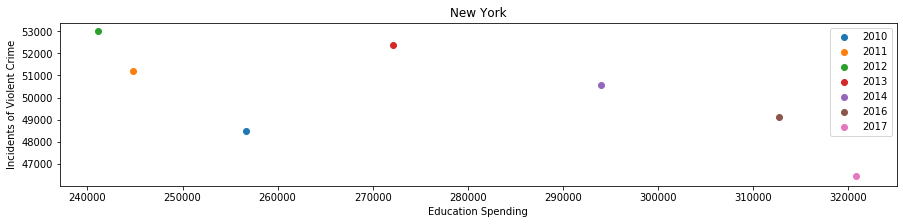

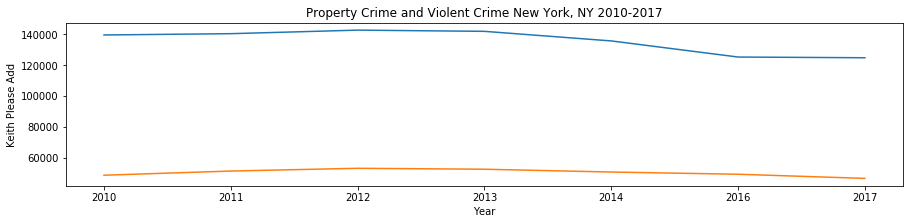

In [193]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 3))
for i in ny_df['year'].values:
    ax.scatter(ny_df['education_services'][ny_df.year==i],ny_df['violent_crime'][ny_df.year==i],label=i)
ax.legend()
#ax.scatter(ny_df['year'],ny_df['violent_crime'],label='crime_rate ()')
plt.title("New York")
plt.xlabel('Education Spending')
plt.ylabel('Incidents of Violent Crime')
#fig, ax = plt.subplots(figsize=(15, 3))
#ax.scatter(ny_df['year'],ny_df['education_services'],label='education')
#ax.scatter(ny_df['year'],ny_df['property_crime'],label='crime_rate')
#plt.title("Property Crime and Violent Crime New York, NY 2010-2017")
#plt.xlabel('Year')

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(ny_df['year'],ny_df['property_crime'],label='property_crime')
ax.plot(ny_df['year'],ny_df['violent_crime'],label='violent crime_rate')
plt.title("Property Crime and Violent Crime New York, NY 2010-2017")
plt.xlabel('Year')
plt.ylabel('Keith Please Add')

In [143]:
ny_df[ny_df==2017].plot.scatter(x="education_services", y="violent_crime",ax=axes[0][0])
#axes[0].set_xlabel("GDP per capita (USD)")
#axes[0].set_ylabel("Life expectancy (years)")
#_ = axes[0].set_title("Countries with a higher GDP have a higher life expectancy")

plt.show()

In [150]:
ny_df[ny_df.year==2016]['education_services']
ny_df[ny_df.year==2016]['violent_crime']

773    49124.0
Name: violent_crime, dtype: float64

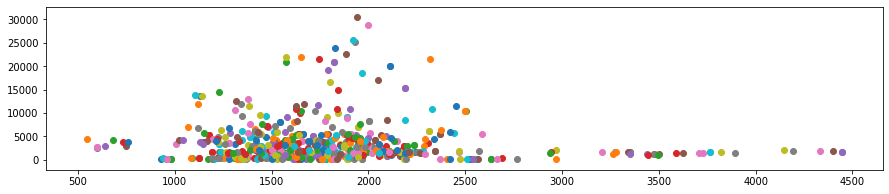

In [219]:
random_sample = merged_fbi_df[merged_fbi_df.city_name.isin(merged_fbi_df.city_name.sample(100).values)][cols]
fig, ax = plt.subplots(figsize=(15, 3))
for i in random_sample['year'].unique():
    for j in random_sample['city_name'].unique():
        by_year = random_sample[random_sample.year==i]
        by_city = by_year[by_year.city_name==j]
        ax.scatter(by_city['education_services'], by_city['violent_crime'],label=str(i)+' '+str(j))
#ax.legend()